In [125]:
## DATABASE

import os
from supabase import create_client, Client

url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)

In [126]:
SERIE_ID = '57XX'
INFO = ""

In [127]:
import pandas as pd
import json
from app import TABLE_DATA

RANGES = [0.22, 2.2, 11, 22, 220, 1100]
DICTO = {
    'RANGE': list(),
    'VALUE1': list(),
    # 'VALUE2': list(),
}
for value in RANGES:
    DICTO['RANGE'].append(value)
    DICTO['VALUE1'].append(value*0.01)
    DICTO['RANGE'].append(value)
    DICTO['VALUE1'].append(value*0.05)
    DICTO['RANGE'].append(value)
    DICTO['VALUE1'].append(value*1)
# DATAFRAME = pd.read_csv(r'C:\Users\GONZA_PA\Desktop\VDC_POINTS.csv')
# DATAFRAME = pd.read_csv(r'/Users/mbair/Desktop/VDC_POINTS.csv')
DATAFRAME = pd.DataFrame(DICTO)
# print(DATAFRAME)

SQL_MODELS = supabase.table("MODELS").select("Id", "DB").execute().data
MODELS = {model['Id']: json.loads(model['DB'])['SPECIFICATIONS'] for model in SQL_MODELS}
SPEC_FLKE_5730A = pd.DataFrame(MODELS['FLKE_5730A']['VDC_SOURCES'])
DATAFRAME['SPEC_FLKE_5730A'] = None
SPEC_FLKE_5720A = pd.DataFrame(MODELS['FLKE_5720A']['VDC_SOURCES'])
DATAFRAME['SPEC_FLKE_5720A'] = None
SPEC_FLKE_5700A = pd.DataFrame(MODELS['FLKE_5700A']['VDC_SOURCES'])
DATAFRAME['SPEC_FLKE_5700A'] = None


SQL_PROCEDURES = supabase.table("PROCEDURES").select("Id", "DB").eq("Id", "VDC_METERS").execute().data[0]['DB']
CMC_DF = pd.DataFrame(json.loads(SQL_PROCEDURES)['CMC'])

# DATAFRAME['CMC'] = None

for iloc in range(len(DATAFRAME)):
    VALUE1 = DATAFRAME.iloc[iloc]['VALUE1']
    # VALUE2 = DATAFRAME.iloc[iloc]['VALUE2']
    VALUE = None
    # print(VALUE1)
    ## 5730
    DATAFRAME.at[iloc, 'SPEC_FLKE_5730A'] = TABLE_DATA.GET_VALUE(SPEC_FLKE_5730A, VALUE1, VALUE2)
    DATAFRAME.at[iloc, 'SPEC_FLKE_5720A'] = TABLE_DATA.GET_VALUE(SPEC_FLKE_5720A, VALUE1, VALUE2)
    DATAFRAME.at[iloc, 'SPEC_FLKE_5700A'] = TABLE_DATA.GET_VALUE(SPEC_FLKE_5700A, VALUE1, VALUE2)
    DATAFRAME.at[iloc, 'CMC'] = TABLE_DATA.GET_VALUE(CMC_DF, VALUE1, VALUE2)
    

display(DATAFRAME)

,RANGE,VALUE1,SPEC_FLKE_5730A,SPEC_FLKE_5720A,SPEC_FLKE_5700A,CMC
0,0.22,0.0022,0.0,0.0,0.000001,0.000002
1,0.22,0.0110,0.0,0.0,0.000001,0.000002
2,0.22,0.2200,0.000002,0.000002,0.000002,0.000003
3,2.20,0.0220,0.000001,0.000001,0.000001,0.000002
4,2.20,0.1100,0.000001,0.000001,0.000001,0.000002
5,2.20,2.2000,0.000012,0.000012,0.000016,0.000012
6,11.00,0.1100,0.000001,0.000001,0.000001,0.000002
7,11.00,0.5500,0.000003,0.000003,0.000005,0.000004
8,11.00,11.0000,0.000041,0.000041,0.000081,0.000055
9,22.00,0.2200,0.000002,0.000002,0.000002,0.000003


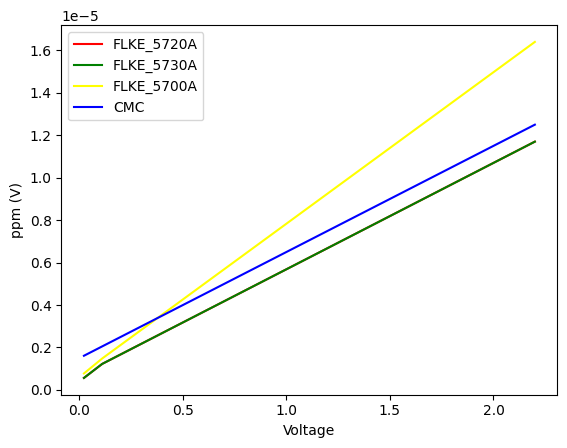

In [128]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

RANGE = 2.2
# DF_FILTERED = DATAFRAME[DATAFRAME['RANGE']=RANGE]
# x = [10,100,1000,2000,3000]
# y = [15, 13,12,16,21] # VALUES
x =  DATAFRAME['VALUE1'][DATAFRAME['RANGE']==RANGE]

FLKE_5720A = DATAFRAME['SPEC_FLKE_5720A'][DATAFRAME['RANGE']==RANGE]
FLKE_5730A = DATAFRAME['SPEC_FLKE_5730A'][DATAFRAME['RANGE']==RANGE]
FLKE_5700A = DATAFRAME['SPEC_FLKE_5700A'][DATAFRAME['RANGE']==RANGE]
CMC = DATAFRAME['CMC'][DATAFRAME['RANGE']==RANGE]

xpoints = np.array(x)

# FLKE_5720A
ypoints = np.array(FLKE_5720A)
plt.plot(xpoints, ypoints, label='FLKE_5720A', color='red')
# plt.scatter(xpoints, ypoints)

# FLKE_5730A
ypoints = np.array(FLKE_5730A)
plt.plot(xpoints, ypoints, label='FLKE_5730A', color='green')
# plt.scatter(xpoints, ypoints)

# FLKE_5730A
ypoints = np.array(FLKE_5700A)
plt.plot(xpoints, ypoints, label='FLKE_5700A', color='yellow')
# plt.scatter(xpoints, ypoints)

# CMC
ypoints = np.array(CMC)
plt.plot(xpoints, ypoints, label='CMC', color='blue')
# plt.scatter(xpoints, ypoints)

# Definir los límites de los ejes
# plt.xlim(0, DATAFRAME['VALUE1'][DATAFRAME['RANGE']==RANGE].max())  # Establece el rango del eje x desde 0 hasta 3500
# plt.ylim(10, 25)   # Establece el rango del eje y desde 10 hasta 25

plt.ylabel("ppm (V)")
plt.xlabel("Voltage")

# Mostrar leyenda
plt.legend()

plt.show()